# Sampling Techniques 

>## Objective :

To understand and implement sampling techniques like : 
- Random Sampling
- Stratified Sampling 
- Random UnderSampling
- Random OverSampling 

> ## Approach  :

The objective will be fulfilled in the following stages : 

- **Data Preprocessing and Cleaning**
- **Visualisation :** (Bar plot)
- **Sampling :**

      - Random Sampling
      - Stratified Sampling 
      
- **Undersampling and Oversampling :**

      - Random Undersampling : Basic code and using Tomeklink
      - Random Oversampling : Basic code and using SMOTE

- **Conclusion**

## 1. Data Preprocessing and Cleaning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\kusht\OneDrive\Desktop\Excel-csv\esc50.csv')

In [3]:
data

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


### Cleaning : 

**TASK: Remove columns : `fold` ,`target` , `esc10` , `src_file` ,`take`**

In [4]:
### START CODE HERE : (~1 line of code)
data.drop(['fold','target','esc10','src_file','take'],axis=1,inplace=True)
### END CODE

**TASK : Filter out `category` as coughing and non-coughing sounds and in a new column `label` , give value `1` for coughing sounds and `0` for non coughing sounds**

In [5]:
### START CODE HERE : 
for i in range(2000) : 
    if data.at[i,'category'] == 'coughing' : data.at[i,'label'] =1
    else : 
        data.at[i,'category'] = 'non-coughing'
        data.at[i,'label'] = 0 
        
### END CODE 

## 2. Visualisation : 

**TASK : Plot a bar graph of `category` attribute**

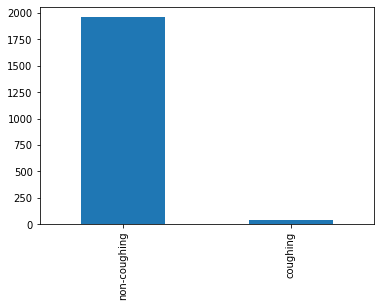

In [6]:
### START CODE HERE : 
data.category.value_counts().plot(kind='bar')
### END CODE HERE

**Observe the imbalance in the dataset**

**TASK: Remove the column `category`**

In [7]:
### START CODE HERE : (~1 Line of code)
data.drop('category',axis=1,inplace=True)

### END CODE HERE

## 3. Sampling : 


Sampling is a method that allows us to get information about the population based on the statistics from a subset of the population (sample), without having to investigate every individual.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-21.png">

Sampling is done to draw conclusions about populations from samples, and it enables to determine a population’s characteristics by directly observing only a portion (or sample) of the population.

    - Selecting a sample requires less time than selecting every item in a population
    - Sample selection is a cost-efficient method
    - Analysis of the sample is less cumbersome and more practical than an analysis of the entire population

### 3.1 Random Sampling : 
The goal is to select a subset of a population in which each member of the subset has an equal probability of being chosen. As the name suggests , the selection of each instance has equal probability and is random

**Random Sampling reduces selection bias**

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-29.png">


One big advantage of this technique is that it is the most direct method of probability sampling. But it comes with a caveat – it may not select enough individuals with the characteristics of interest

**TASK : Select 500 instances randomly and print how many of them are `coughing`**

In [8]:
### START CODE HERE : 
## Use 'sample()'
random_df = data.sample(500)
random_df.label.value_counts()
### END CODE

0.0    489
1.0     11
Name: label, dtype: int64

**Observe the distribution of `label`**

### 3.2 Stratified Sampling :

In statistics, stratified sampling is a method of sampling from a population which can be partitioned into subpopulations. An example to explain better would be to assume that we need to estimate the average number of votes for each candidate in an election. Assume that a country has 3 towns: Town A has 1 million factory workers, Town B has 2 million office workers and Town C has 3 million retirees. A choice can be to get a random sample of size 60 over the entire population but there is some chance that the resulting random sample is poorly balanced across these towns and hence is biased, causing a significant error in estimation. Instead if its better to take a random sample of 10, 20 and 30 from Town A, B and C respectively, then one can produce a smaller error in estimation for the same total sample size. This method is generally used when a population is not a homogeneous group.

<img src="https://camo.githubusercontent.com/fb8a4c70ac5c67fdd7485b5034e5bf1049f1e5d6/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f662f66612f537472617469666965645f73616d706c696e672e504e472f32323070782d537472617469666965645f73616d706c696e672e504e47">

Basically, the population is divided into subgroups (called strata) based on different traits like gender, category, etc. And then samples(s) are selected from this subgroup:

<img src="https://camo.githubusercontent.com/f7f2dcfc1e05a6bb2475c2e8ea7975c951bc9954/68747470733a2f2f7777772e7265736561726368676174652e6e65742f70726f66696c652f53746566616e6f5f466572696c6c692f7075626c69636174696f6e2f3231363739393632332f6669677572652f666967332f41533a36353034303932373834363831303840313533323038313036343539342f537472617469666965642d73616d706c696e672d6d6574686f646f6c6f67792e706e67">

**TASK : Get a stratified set of size 500 from the dataset** 

In [9]:
### START CODE HERE : 
from sklearn.model_selection import train_test_split

df_temp1 , stratified_set = train_test_split(data , stratify=data.label , test_size=0.25)
### END CODE

**TASK : Print the `label` distribution using `value_counts()`**

In [10]:
### START CODE HERE : 
stratified_set.label.value_counts()
#### END CODE 

0.0    490
1.0     10
Name: label, dtype: int64

**Observe the difference between random samples and stratified samples** 

## 4. Undersampling and Oversampling : 

Very often analysis has to be done on imbalanced dataset and thus a widely adopted technique for dealing with highly imbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling)

<img src="https://miro.medium.com/max/1400/0*u6pKLqdCDsG_5kXa.png">

### 4.1 Random UnderSampling : 

**TASK : Find the number of instances for labels 0 and 1 and store it in in `num_0` and `num_1`**

In [11]:
### START CODE HERE : 
num_0 = len(data[data.label==0])
num_1 = len(data[data.label==1])
print(num_0,num_1)
### END CODE

1960 40


**TASK : Sample `num_1` instances of data with `label=0` and concatenate it with data having `label=1` into a new dataset and print the dataset's length and label distribution**

In [12]:
### START CODE HERE : 
undersampled_data = pd.concat([ data[data.label==0].sample(num_1) , data[data.label==1] ])
print(undersampled_data.label.value_counts())
print('Length: ' ,len(undersampled_data))
### END CODE

1.0    40
0.0    40
Name: label, dtype: int64
Length:  80


> #### Undersampling using Tomeklinks

Over- and undersampling selects examples randomly to adjust their proportions.However Tomeklink approach examine the instance space carefully and decide what to do based on their neighborhoods.

**Tomek links** are pairs of instances of opposite classes who are their own nearest neighbors. In other words, they are pairs of opposing instances that are very close together.


<img src="https://miro.medium.com/max/1400/0*huy_9J15wzYJ2o5S">

Tomek’s algorithm looks for such pairs and removes the majority instance of the pair. The idea is to clarify the border between the minority and majority classes, making the minority region(s) more distinct. The diagram above shows a simple example of Tomek link removal.

**NOTE** : TomekLinks first findds the nearest neighbors in the same way as K-NN technique , so our input data must have all numerical attributes for the algortihm to work

**TASK : Convert filename to numerical attribute**

In [13]:
## Replace [A:1,B:2,C:3,D:4,E:5,F:6,G:7,H:8]
## Strip '-' characters
## strip '.wav' characters
## You can use apply lambda approach 
data_numerical=data.copy()
### START CODE HERE : 
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('A','1'))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('B','2'))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('C','3'))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('D','4'))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('E','5'))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('F','6'))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('G','7'))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('H','8'))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.replace('-',''))
data_numerical.filename=data_numerical.filename.apply(lambda x: x.strip('.wav'))
### END CODE 

**TASK : Convert the attribute filename to float64**

In [14]:
data_numerical.filename=data_numerical.filename.astype('float64')

**TASK : Implement `Tomeklink`  and return the new X,y and the indices and find the `length` of new dataset**

In [15]:
from imblearn.under_sampling import TomekLinks
X=data_numerical.drop('label',axis=1)
y=data_numerical.label

### START CODE HERE : 
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl,y_tl, id_tl = tl.fit_sample(X,y)
### END CODE

In [16]:
len(X_tl)

1980

**Asses if TomekLink was useful or not by seeing the length of the new dataset. If unuseful , try to justify it**


ANS : As the ID's were made just by removing figures , it holds no real meaning to classify a sound based on it. A proper dataset with relevant attributes can result in a better outcome

### 4.2 Random OverSampling : 

**TASK : Find the number of instances for labels 0 and 1 and store it in in `num_0` and `num_1`**

In [17]:
### START CODE HERE : 
num_0 = len(data[data.label==0])
num_1 = len(data[data.label==1])
print(num_0,num_1)
### END CODE

1960 40


**TASK : Make the size of instances with label=1(minority class) equal to the majority class by `replace=True` argument then , concatenate it with instances having label=0 (num_0) and print the length and distribution of new dataset**

In [18]:
### START CODE HERE : 
oversampled_data = pd.concat([ data[data.label==0] , data[data.label==1].sample(num_0, replace=True) ])
print(oversampled_data.label.value_counts())
print(len(oversampled_data))

1.0    1960
0.0    1960
Name: label, dtype: int64
3920


> #### OverSampling Using SMOTE : 

**SMOTE** is another approach involving not resampling of examples, but synthesis of new ones. The idea is to create new minority examples by interpolating between existing ones. The process is basically as follows. Assume we have a set of majority and minority examples, as before:

<img src="http://www.svds.com/wp-content/uploads/2016/08/ImbalancedClasses_fig11.png">

It is important to note a substantial limitation of SMOTE. Because it operates by interpolating between rare examples, it can only generate examples within the body of available examples—never outside. Formally, SMOTE can only fill in the convex hull of existing minority examples, but not create new exterior regions of minority examples.

<img src="https://miro.medium.com/max/1400/0*UrGYcz_Ab-HTo4-B.png">

To summarise SMOTE , In SMOTE (Synthetic Minority Oversampling Technique) elements are synthesized for the minority class, in the vicinity of already existing elements.

**NOTE :** Like TomekLinks , SMOTE is also based on neighboring algorithm so again , numerical dataset has to be used

**TASK : Implement `SMOTE`  and return the new X,y and the `length` of new dataset`**

In [19]:
### START CODE HERE :  

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

print(len(X_sm))

3920


**Asses if SMOTE can be useful or not**

## 5. Conclusion

Based on the dataset , choose a relevant sampling and understand the best way to implement it 